## Esercizi Filtraggio

In [11]:
# Librerie
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
plt.rcParams['figure.figsize'] = [10, 5]

### Esercizio 1

In [2]:
def smooth(x : np.array) -> np.array:
    # Funzione che esegue un filtraggio utilizzando un filtro di smoothing 3x3
    
    # Definizione della matrice di smoothing
    h = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=x.dtype)
    h = h/16

    # Applicazione della matrice di smoothing
    y = ndi.correlate(x, h, mode="reflect")

    return y

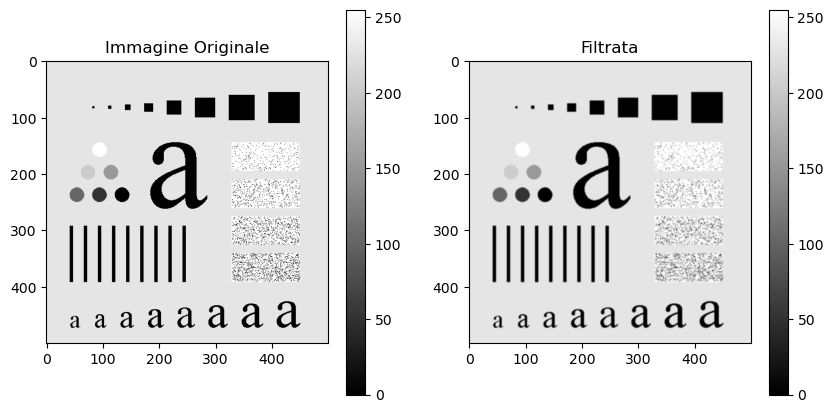

In [6]:
# Test della funzione
x = io.imread("img/test.jpg")
x = np.float32(x)

y = smooth(x)

# Risutati
plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Immagine Originale")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Filtrata")
plt.colorbar()

### Esercizio 2

Text(0.5, 1.0, 'Risultato')

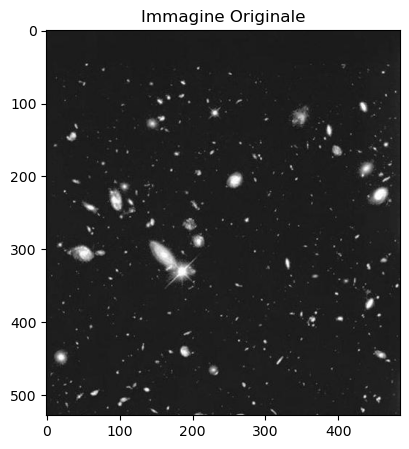

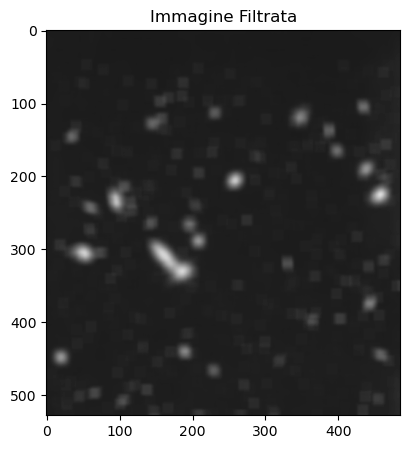

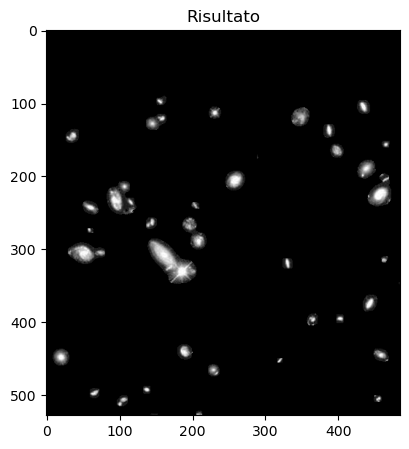

In [14]:
# Lettura dell'immagine
x = io.imread("img/space.jpg")
x = np.float32(x)

# Visualizzazione dell'immagine originale
plt.figure()
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Immagine Originale")

# Effettuo la media aritmetica su una finestra 15x15
k = 15
avg_15 = ndi.uniform_filter(x, size=(k,k))

plt.figure()
plt.imshow(avg_15, clim=[0,255], cmap="gray")
plt.title("Immagine Filtrata")

# Effettuazione del trashholding
# 1. Calcolo il valore di soglia
soglia = np.max(y)*0.25

# 2. Calcolo la maschera della soglia
mask = avg_15 > soglia

y = mask*x

plt.figure()
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Risultato")



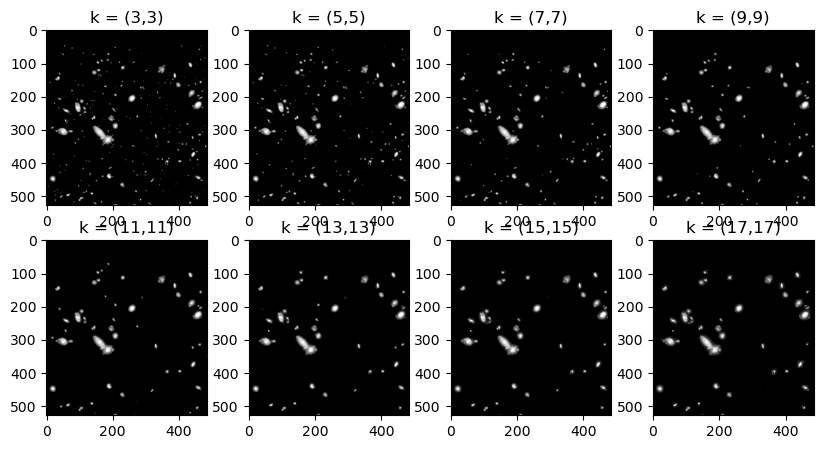

In [19]:
# Prova con più maschere

dim_masks = [3,5,7,9,11,13,15,17]

plt.figure()

for i in range(len(dim_masks)):
    k = dim_masks[i]
    avg = ndi.uniform_filter(x, size=(k,k))
    soglia = np.max(avg)*0.25
    mask = avg > soglia
    y = mask*x

  
    plt.subplot(2,4,i+1)
    plt.imshow(y, clim=[0,255], cmap="gray")
    plt.title("k = (" + str(k) + "," + str(k) + ")")



In [5]:
def mse(x : np.array, y : np.array) -> float:
    diff = (x - y)**2
    mse = np.mean(diff)
    return mse

In [6]:
def media(x : np.array, k : int) -> np.array:
    y=ndi.uniform_filter(x,size=(k,k))
    return y

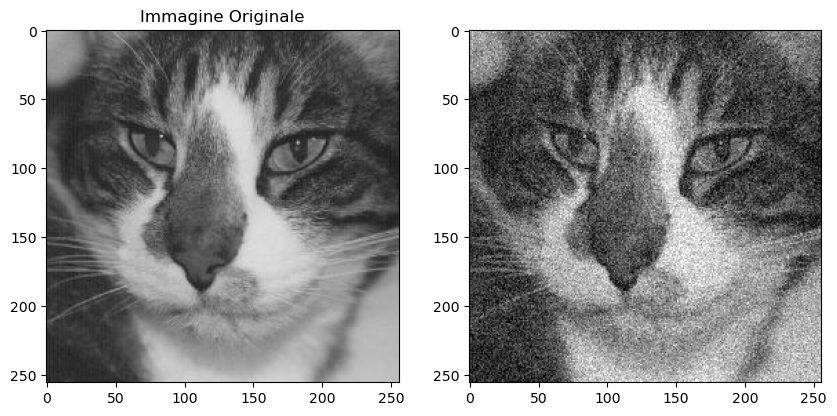

In [ ]:
# Carico l'immagine
x = io.imread("img/dorian.jpg")
x = np.float32(x)

# Estraggo le dimensioni della foto
(M,N) = x.shape

# Genero il rumore bianco gaussiano
# Definisco la deviazione standard, più è grande e maggiore sarà il rumore
d = 25

# Genero il rumore
n = d * np.random.randn(M,N)

# Vado a considerare l'immagine rumorosa
# modellizzando il rumore come AWGN additivo
noisy = x + n

plt.figure()

plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Immagine Originale")

plt.subplot(1,2,2)
plt.imshow(noisy, clim=[0,255], cmap="gray")
plt.title("Immagine rumorosa")

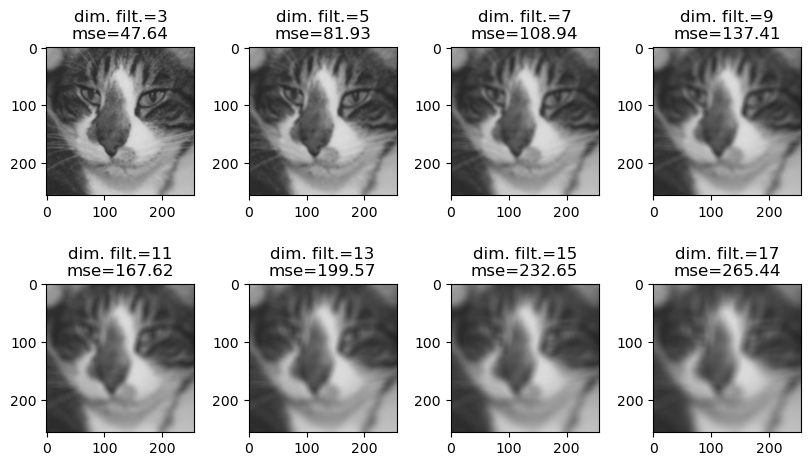

In [19]:
# Vado ad effettuare il denoising con la media sulle seguenti maschere
dim_masks = [3,5,7,9,11,13,15,17]

plt.figure()
plt.subplots_adjust(hspace=0.6)
for i in range(len(dim_masks)):
    # Calcolo la media
    avg = media(x, dim_masks[i])

    # Calcolo l'errore quadratico medio
    quad_err = mse(x, avg)

    # Stampa dei risultati sull'immagine
    plt.subplot(2,4,i+1)
    plt.imshow(avg, clim=[0,255], cmap="gray")
    plt.title("dim. filt.=" + str(dim_masks[i]) + "\nmse=" + str(round(quad_err,2)))

Tecnica di denoising adattiva

Text(0.5, 1.0, 'Immagine equalizzata\nmse=121.67')

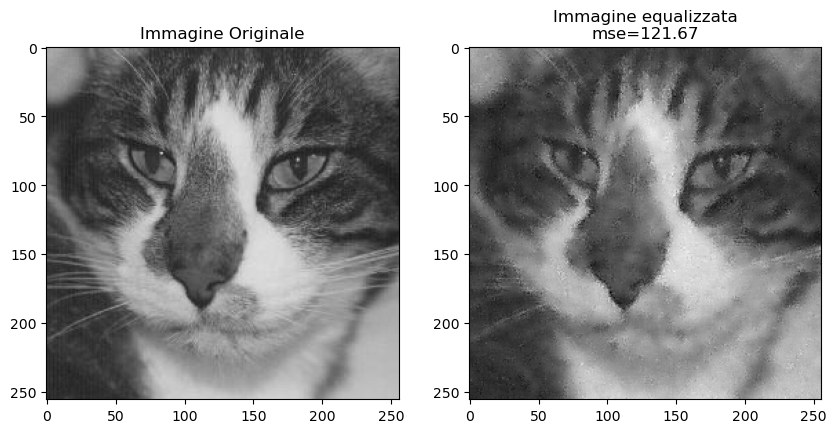

In [ ]:
# Importo l'immagine
x = io.imread("img/dorian.jpg")
x = np.float32(x)

# Estraggo le dimensioni
(M,N) = x.shape

# Definisco il rumore
d = 25
n = d*np.random.randn(M,N)

# Vado a considerare l'immagine completa
noisy = x + n

# Effettuo la tecnica di denoising adattiva
# che mi permette di adattare i parametri in base a dove effettuo la media
# in particolare vado ad effettuare una media più marcata

# Medie locali
avg_loc = ndi.uniform_filter(noisy, (7,7), mode="reflect")

# Varianze locali
var_loc = ndi.generic_filter(noisy, np.var, (7,7), mode="reflect", output=np.float32)

# Tecnica di gestione adattiva
x_cap = noisy - (((d**2)/(var_loc))*(noisy - avg_loc))

# Calcolo mse
quad_err = mse(x, x_cap)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Immagine Originale")

plt.subplot(1,2,2)
plt.imshow(x_cap, clim=[0,255], cmap="gray")
plt.title("Immagine equalizzata\nmse=" + str(round(quad_err, 2)))

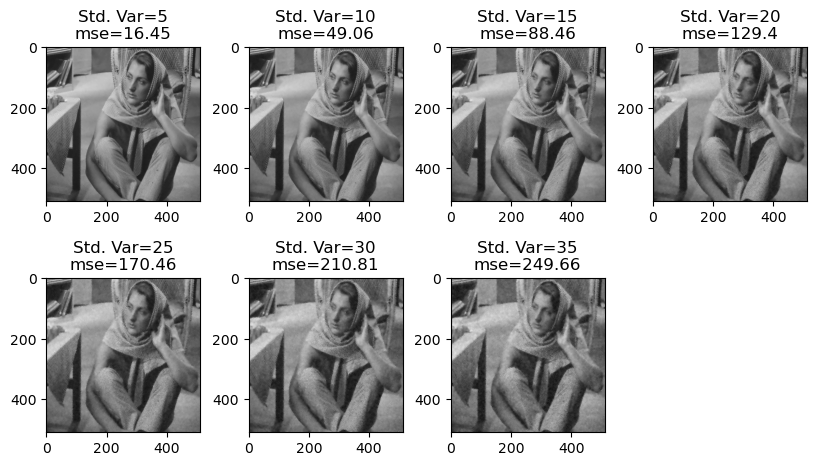

In [31]:
x = io.imread("img/barbara.gif")
x = np.float32(x)

# Estraggo le dimensioni
(M,N) = x.shape

var_list = np.arange(5, 36, 5)

plt.figure()
plt.subplots_adjust(hspace=0.5)

for i in range(len(var_list)):
    d = var_list[i]
    n = d*np.random.randn(M,N)
    noisy = x + n
    avg_loc = ndi.uniform_filter(noisy, (7,7), mode="reflect")
    var_loc = ndi.generic_filter(noisy, np.var, (7,7), mode="reflect")
    x_cap = noisy - (((d**2)/(var_loc))*(noisy - avg_loc))
    quad_err = mse(x, x_cap)

    plt.subplot(2, 4, i+1)
    plt.imshow(x_cap, clim=[0,255], cmap="gray")
    plt.title("Std. Var=" + str(d) + "\nmse=" + str(round(quad_err, 2)))   
    

### Esercizio 3

Text(0.5, 1.0, 'S&P noised')

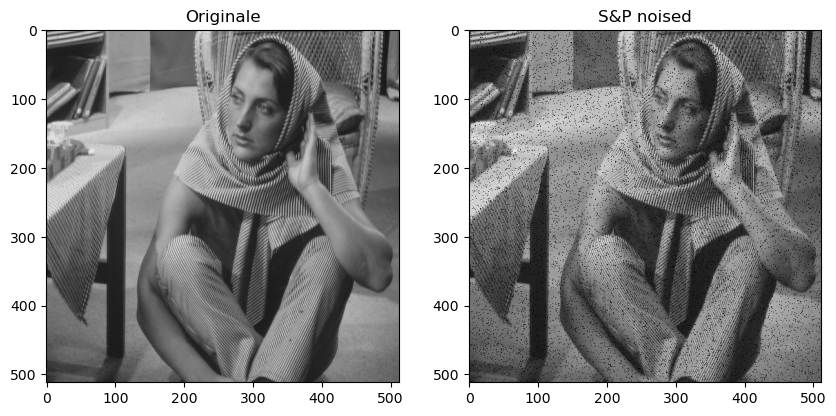

In [ ]:
from skimage.util import random_noise

# Prelevo l'immagine
x = io.imread("img/barbara.gif")
x = np.float32(x)

# Genero rumore sale e pepe
n = random_noise(x ,mode="s&p", amount=0.1)

# Applico il rumore sale e pepe
noisy = x*n

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Originale")

plt.subplot(1,2,2)
plt.imshow(noisy, clim=[0,255], cmap="gray")
plt.title("S&P noised")

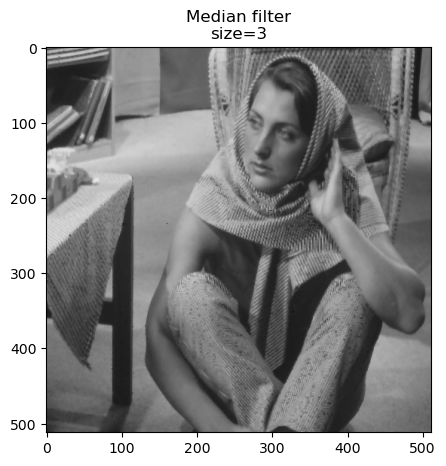

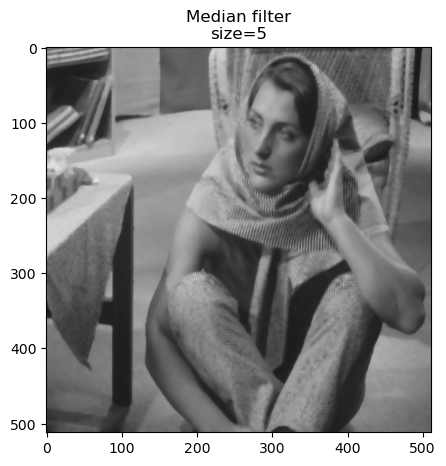

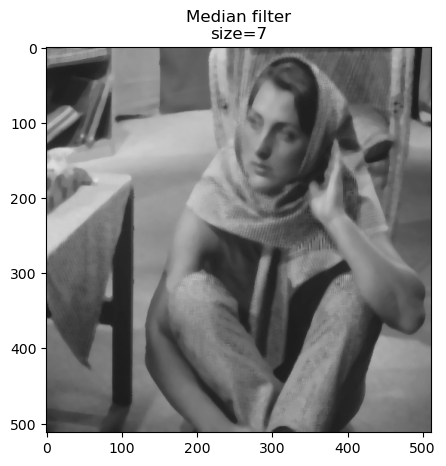

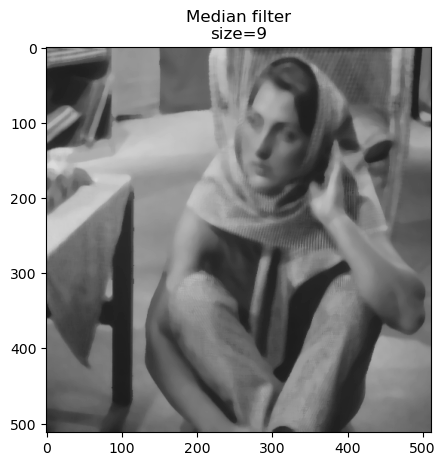

In [46]:
# Per equalizzare posso utilizzare il filtro non lineare della mediana
mask_size = [3, 5, 7, 9]

for i in range(len(mask_size)):
    k = mask_size[i]
    x_cap = ndi.median_filter(noisy, (k,k), mode="reflect")

    plt.figure()
    plt.imshow(x_cap, clim=[0,255], cmap="gray")
    plt.title("Median filter\nsize=" + str(k))